Netflix Content Analysis

This project explores Netflix’s content library to identify trends in content type, release years, country distribution, movie duration, and audience ratings using Python and Pandas.

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('netflix_titles.csv')

Initial Data Exploration

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.isna().sum() 


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Data Cleaning & Preprocessing

In [7]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['date_added'] = df['date_added'].fillna('Unkown')
df['rating'] = df['rating'].fillna('Unknown')
df['duration'] = df['duration'].fillna('Unknown')

In [7]:
df['release_year'].unique()[:20]
df['release_year'].min()

np.int64(1925)

In [8]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
genre_col = 'listed_in'

Genre Analysis

In [7]:
df_genre = df.copy()

df_genre[genre_col] = df_genre[genre_col].fillna('Unknown')
df_genre['genre_list'] = df_genre[genre_col].str.split(',')
df_genre = df_genre.explode('genre_list')
df_genre['genre_list'] = df_genre['genre_list'].str.strip()

In [22]:
df_genre[['title', genre_col, 'genre_list']].head(10)

,title,listed_in,genre_list
0,Dick Johnson Is Dead,Documentaries,Documentaries
1,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries",International TV Shows
1,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries",TV Dramas
1,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries",TV Mysteries
2,Ganglands,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows
2,Ganglands,"Crime TV Shows, International TV Shows, TV Act...",International TV Shows
2,Ganglands,"Crime TV Shows, International TV Shows, TV Act...",TV Action & Adventure
3,Jailbirds New Orleans,"Docuseries, Reality TV",Docuseries
3,Jailbirds New Orleans,"Docuseries, Reality TV",Reality TV
4,Kota Factory,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows


In [18]:
df.head(
    
)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
top_genres = df_genre['genre_list'].value_counts()
top_genres

genre_list
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows            

In [9]:
top_genres.head(10)

genre_list
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

In [22]:
top_genres_df = top_genres.reset_index()
top_genres_df.columns = ['genre', 'count']
top_genres_df.head()


,genre,count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869


In [10]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [4]:
df['type'].value_counts(normalize=True)* 100

type
Movie      69.615079
TV Show    30.384921
Name: proportion, dtype: float64

Release Year Trend Analysis

In [11]:
year_counts = df['release_year'].value_counts().sort_index()
year_counts

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64

In [12]:
year_counts.tail(20)

release_year
2002      51
2003      61
2004      64
2005      80
2006      96
2007      88
2008     136
2009     152
2010     194
2011     185
2012     237
2013     288
2014     352
2015     560
2016     902
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, dtype: int64

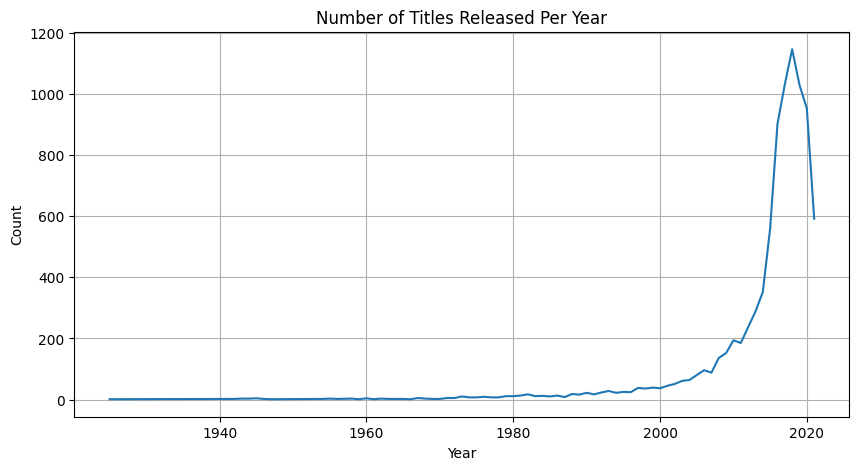

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(year_counts.index, year_counts.values)
plt.title("Number of Titles Released Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()


Country-wise Content Analysis

In [15]:
df['country'].isna().sum()

np.int64(831)

In [17]:
country_counts = df['country'].value_counts()
country_counts

country
United States                                    2818
India                                             972
United Kingdom                                    419
Japan                                             245
South Korea                                       199
                                                 ... 
Russia, Spain                                       1
Croatia, Slovenia, Serbia, Montenegro               1
Japan, Canada                                       1
United States, France, South Korea, Indonesia       1
United Arab Emirates, Jordan                        1
Name: count, Length: 748, dtype: int64

In [18]:
country_counts.head(10)

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

In [20]:
top_countries_df = country_counts.head(10).reset_index()
top_countries_df.columns = ['country', 'count']
top_countries_df

,country,count
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199
5,Canada,181
6,Spain,145
7,France,124
8,Mexico,110
9,Egypt,106


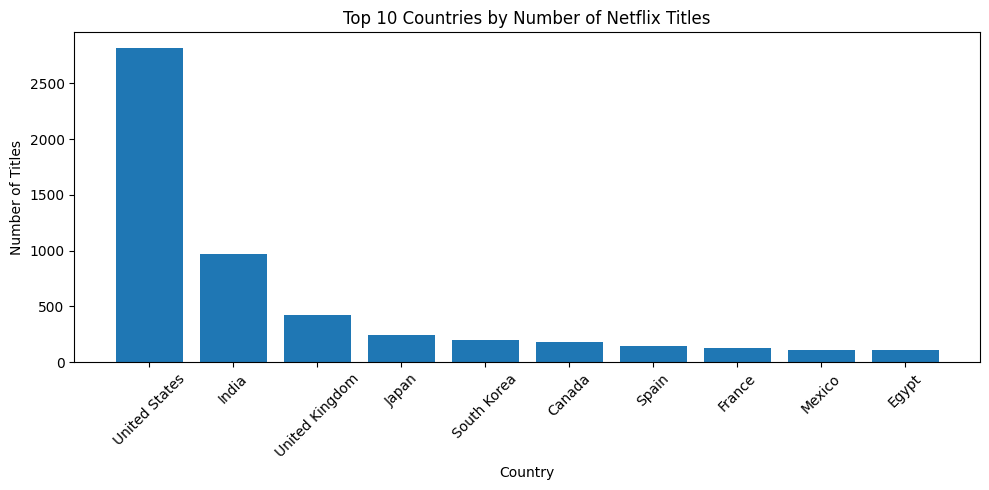

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(top_countries_df['country'], top_countries_df['count'])
plt.title("Top 10 Countries by Number of Netflix Titles")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Duration Analysis (Movies)

In [25]:
def to_minutes(x):
    if pd.isna(x):
        return None
    
    x = str(x)
    if "min" in x:
        return int(x.split()[0])
    else:
        return None
       

df['duration_min'] = df['duration'].apply(to_minutes)
df[['duration', 'duration_min']].head(10)

,duration,duration_min
0,90 min,90.0
1,2 Seasons,NaN
2,1 Season,NaN
3,1 Season,NaN
4,2 Seasons,NaN
5,1 Season,NaN
6,91 min,91.0
7,125 min,125.0
8,9 Seasons,NaN
9,104 min,104.0


In [27]:
df['duration_min'].describe()

count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_min, dtype: float64

In [28]:
df.loc[df['duration_min'].idxmin(), ['title', 'duration']]

title       Silent
duration     3 min
Name: 3777, dtype: object

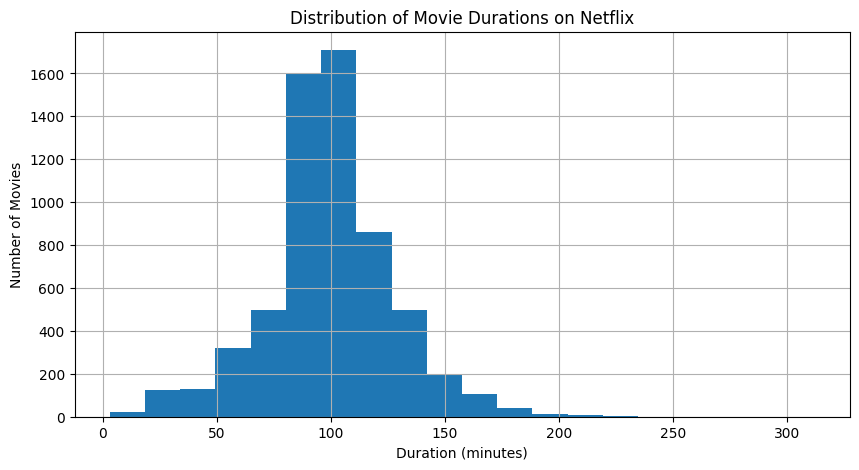

In [29]:
import matplotlib.pyplot as plt

df['duration_min'].dropna().hist(bins=20, figsize=(10,5))
plt.title("Distribution of Movie Durations on Netflix")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.show()


Ratings Analysis

In [30]:
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [31]:
df['rating'].value_counts().head(10)


rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64

In [32]:
ratings_df  = df['rating'].value_counts().reset_index()
ratings_df.columns = ['rating', 'count']
ratings_df

,rating,count
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


Visualizations

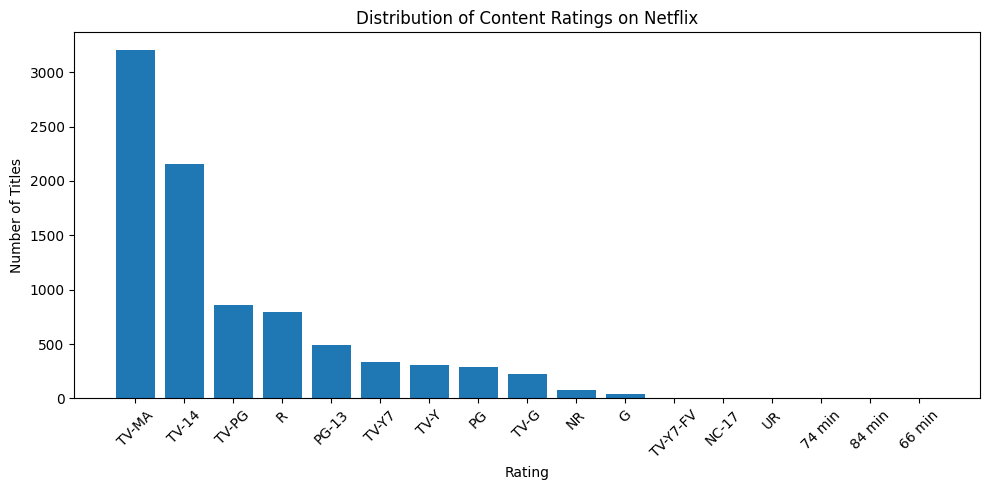

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(ratings_df['rating'], ratings_df['count'])
plt.title("Distribution of Content Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


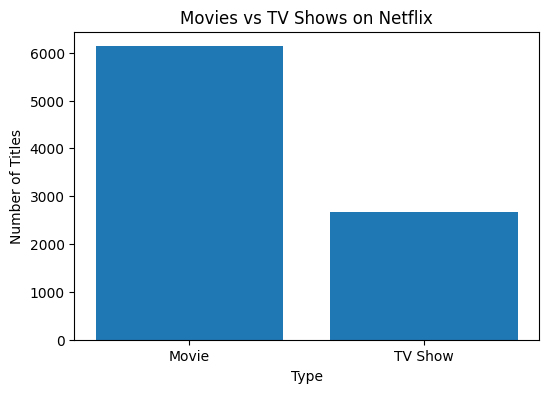

In [34]:
type_counts = df['type'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values)
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Number of Titles")
plt.show()


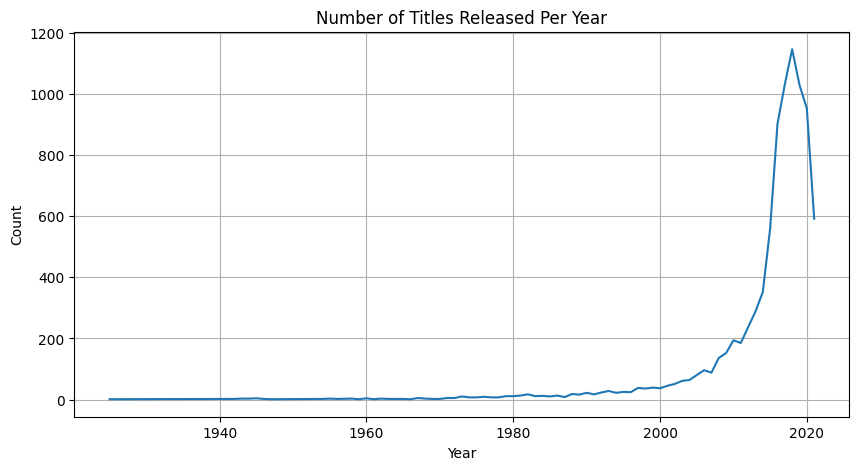

In [35]:
year_counts = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(year_counts.index, year_counts.values)
plt.title("Number of Titles Released Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()


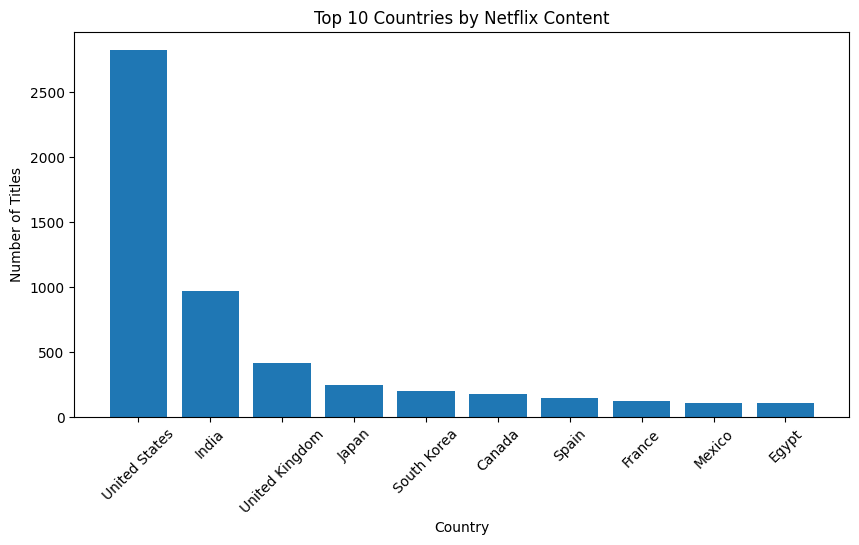

In [36]:
top_countries = df['country'].value_counts().head(10)
top_countries_df = top_countries.reset_index()
top_countries_df.columns = ['country', 'count']

plt.figure(figsize=(10,5))
plt.bar(top_countries_df['country'], top_countries_df['count'])
plt.title("Top 10 Countries by Netflix Content")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


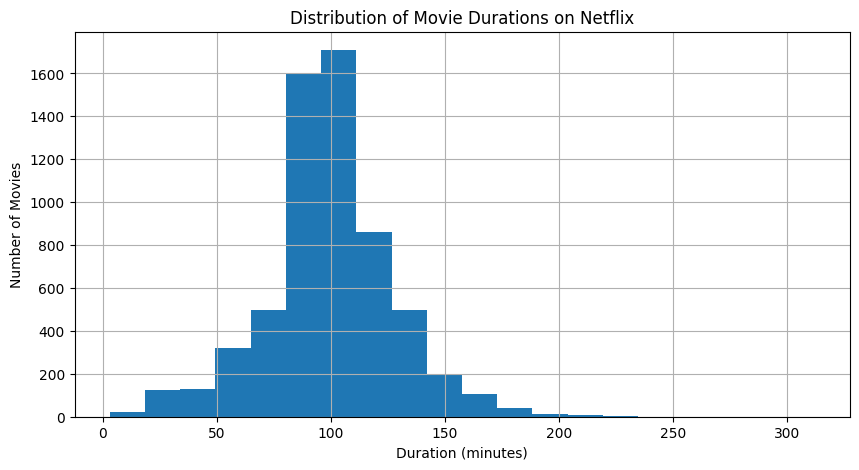

In [37]:
df['duration_min'].dropna().hist(bins=20, figsize=(10,5))
plt.title("Distribution of Movie Durations on Netflix")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.show()
